In [29]:
import pandas as pd
import numpy as np
import warnings
import tkinter as tk
from tkinter import ttk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

df = pd.read_csv("Euro2024New.csv")

In [30]:
df

,Team1,Team2,Plays,Win_Team1,Win_Team2,Draws,Goals_Team1,Goals_Team2,Points_Team1,Points_Team2,Team1_ATT_Rating,Team2_ATT_Rating,Team1_DEF_Rating,Team2_DEF_Rating,Prob Team 1,Prob Team 2,Team1_Result
0,France,Belgium,75.0,26.0,30.0,19.0,131.0,162.0,97.0,109.0,5.933134,7.412039,7.337158,5.993686,0.346667,0.400000,-1.0
1,France,England,34.0,10.0,19.0,5.0,41.0,90.0,35.0,62.0,1.856935,4.117800,4.076199,1.875887,0.294118,0.558824,-1.0
2,France,Portugal,28.0,19.0,6.0,3.0,52.0,31.0,60.0,21.0,2.355137,1.418353,1.404024,2.379173,0.678571,0.214286,1.0
3,France,Netherlands,30.0,15.0,11.0,4.0,53.0,57.0,49.0,37.0,2.400428,2.607940,2.581592,2.424926,0.500000,0.366667,1.0
4,France,Spain,36.0,13.0,16.0,7.0,39.0,64.0,46.0,55.0,1.766353,2.928213,2.898630,1.784380,0.361111,0.444444,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,Georgia,Turkey,5.0,1.0,3.0,1.0,5.0,12.0,4.0,10.0,0.226455,0.549040,0.543493,0.228767,0.200000,0.600000,-1.0
548,Georgia,Romania,8.0,1.0,5.0,2.0,6.0,20.0,5.0,17.0,0.271747,0.915067,0.905822,0.274520,0.125000,0.625000,-1.0
549,Georgia,Slovakia,2.0,1.0,1.0,0.0,3.0,3.0,3.0,3.0,0.135873,0.137260,0.135873,0.137260,0.500000,0.500000,0.0
550,Georgia,Slovenia,4.0,1.0,2.0,1.0,4.0,5.0,4.0,7.0,0.181164,0.228767,0.226455,0.183013,0.250000,0.500000,-1.0


In [31]:
columns_to_drop = ['Prob Team 1', 'Prob Team 2'] 
df = df.drop(columns=columns_to_drop, errors='ignore')

In [49]:
# df.hist(bins=15, figsize=(15, 10))
# plt.tight_layout()
# plt.show()

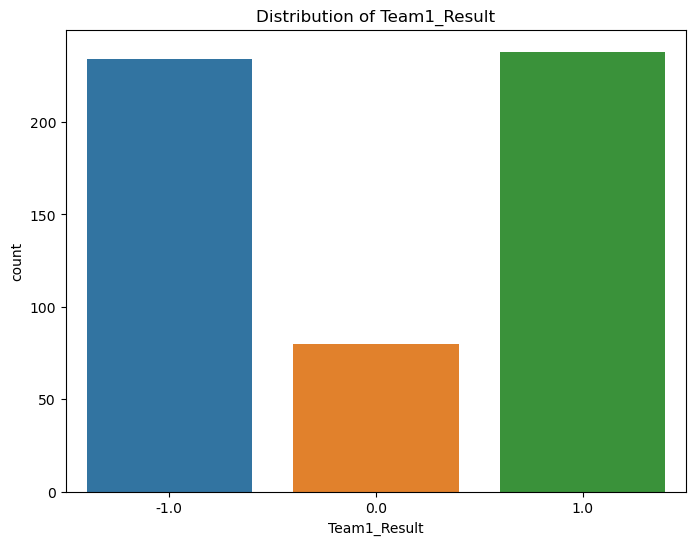

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Team1_Result', data=df)
plt.title("Distribution of Team1_Result")
plt.show()

In [51]:
# sns.pairplot(df, hue='Team1_Result')
# plt.show()

In [45]:
# df.loc[1, 'Plays'] = np.nan
# df.loc[3, 'Win_Team1'] = np.nan
# df.loc[4, 'Draws'] = np.nan

print("Missing values in each column:\n", df.isna().sum())

Missing values in each column:
 Team1               0
Team2               0
Plays               0
Win_Team1           0
Win_Team2           0
Draws               0
Goals_Team1         0
Goals_Team2         0
Points_Team1        0
Points_Team2        0
Team1_ATT_Rating    0
Team2_ATT_Rating    0
Team1_DEF_Rating    0
Team2_DEF_Rating    0
Team1_Result        0
dtype: int64


In [ ]:
columns_to_fill = ['Plays', 'Win_Team1', 'Win_Team2', 'Draws', 'Goals_Team1', 'Goals_Team2', 'Points_Team1', 'Points_Team2', 
                   'Team1_ATT_Rating', 'Team2_ATT_Rating', 'Team1_DEF_Rating', 'Team2_DEF_Rating']
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())

df['Team1_Result'] = df['Team1_Result'].fillna(0)  

print("\nDataFrame after filling NaN values with mean:\n", df)
print("\nMissing values in each column after filling:\n", df.isna().sum())

In [43]:
X = df[['Plays', 'Win_Team1', 'Win_Team2', 'Draws', 'Goals_Team1', 'Goals_Team2', 'Points_Team1', 'Points_Team2', 
        'Team1_ATT_Rating', 'Team2_ATT_Rating', 'Team1_DEF_Rating', 'Team2_DEF_Rating']]
y = df['Team1_Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# model = LogisticRegression(max_iter=1000)  
# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore", category=ConvergenceWarning)
#     model.fit(X_train, y_train)

# predictions = model.predict(X_test)
# accuracy = accuracy_score(y_test, predictions)
# print(f"Model Accuracy: {accuracy}")

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB()
}

for model_name, model in models.items():
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")
    
#     comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
#     print(f"{model_name} Predictions:\n{comparison_df}\n")
    
    combined = pd.DataFrame({'Actual': y_test, 'Prediction': predictions})    
    crosstab = pd.crosstab(index=combined["Actual"], columns=combined["Prediction"])
    print(f"{model_name} Cross-Tabulation:\n{crosstab}\n")

Logistic Regression Accuracy: 0.963963963963964
Logistic Regression Cross-Tabulation:
Prediction  -1.0   0.0   1.0
Actual                      
-1.0          43     0     0
 0.0           4    12     0
 1.0           0     0    52

Decision Tree Accuracy: 0.972972972972973
Decision Tree Cross-Tabulation:
Prediction  -1.0   0.0   1.0
Actual                      
-1.0          42     0     1
 0.0           1    15     0
 1.0           1     0    51

Random Forest Accuracy: 0.9819819819819819
Random Forest Cross-Tabulation:
Prediction  -1.0   0.0   1.0
Actual                      
-1.0          42     0     1
 0.0           1    15     0
 1.0           0     0    52

Gaussian Naive Bayes Accuracy: 0.4144144144144144
Gaussian Naive Bayes Cross-Tabulation:
Prediction  -1.0   0.0   1.0
Actual                      
-1.0          13    27     3
 0.0           1    14     1
 1.0           1    32    19



In [5]:
def predict_match_result(team1, team2, team1_att_diff, team2_att_diff, team1_def_diff, team2_def_diff):
    new_match = pd.DataFrame({
        'Plays': [0],  
        'Win_Team1': [0],  
        'Win_Team2': [0],  
        'Draws': [0],  
        'Goals_Team1': [0], 
        'Goals_Team2': [0],  
        'Points_Team1': [0], 
        'Points_Team2': [0],  
        'Team1_ATT_Rating': [team1_att_diff],
        'Team2_ATT_Rating': [team2_att_diff],
        'Team1_DEF_Rating': [team1_def_diff],
        'Team2_DEF_Rating': [team2_def_diff]
    })

    new_match_scaled = scaler.transform(new_match)
    prediction = model.predict(new_match_scaled)
    
    result_text = "win" if prediction[0] == 1 else "lose" if prediction[0] == -1 else "draw"
    return f"The predicted result for {team1} vs {team2} is: {team1} will {result_text}."

In [53]:
def on_predict():
    team1 = team1_var.get()
    team2 = team2_var.get()
    team1_att_diff = team1_att_diff_scale.get()
    team2_att_diff = team2_att_diff_scale.get()
    team1_def_diff = team1_def_diff_scale.get()
    team2_def_diff = team2_def_diff_scale.get()
    
    result = predict_match_result(team1, team2, team1_att_diff, team2_att_diff, team1_def_diff, team2_def_diff)
    result_label.config(text=result)

root = tk.Tk()
root.title("Football Match Predictor")

teams = ['France', 'Belgium', 'England', 'Portugal', 'Netherlands', 'Spain', 'Italy', 'Croatia', 'Germany', 'Switzerland', 'Denmark', 'Ukraine', 'Austria', 'Hungary', 'Poland', 'Serbia', 'Czechia', 'Scotland', 'Turkey', 'Romania', 'Slovakia', 'Slovenia', 'Albania', 'Georgia']

team1_var = tk.StringVar(value=teams[0])
team2_var = tk.StringVar(value=teams[1])

ttk.Label(root, text="Select Team 1:").grid(column=0, row=0, padx=10, pady=5)
team1_menu = ttk.Combobox(root, textvariable=team1_var, values=teams)
team1_menu.grid(column=1, row=0, padx=10, pady=5)

ttk.Label(root, text="Select Team 2:").grid(column=0, row=1, padx=10, pady=5)
team2_menu = ttk.Combobox(root, textvariable=team2_var, values=teams)
team2_menu.grid(column=1, row=1, padx=10, pady=5)

ttk.Label(root, text="Team 1 ATT Difference:").grid(column=0, row=2, padx=10, pady=5)
team1_att_diff_scale = tk.Scale(root, from_=0, to=100, orient=tk.HORIZONTAL)
team1_att_diff_scale.grid(column=1, row=2, padx=10, pady=5)

ttk.Label(root, text="Team 2 ATT Difference:").grid(column=0, row=3, padx=10, pady=5)
team2_att_diff_scale = tk.Scale(root, from_=0, to=100, orient=tk.HORIZONTAL)
team2_att_diff_scale.grid(column=1, row=3, padx=10, pady=5)

ttk.Label(root, text="Team 1 DEF Difference:").grid(column=0, row=4, padx=10, pady=5)
team1_def_diff_scale = tk.Scale(root, from_=0, to=100, orient=tk.HORIZONTAL)
team1_def_diff_scale.grid(column=1, row=4, padx=10, pady=5)

ttk.Label(root, text="Team 2 DEF Difference:").grid(column=0, row=5, padx=10, pady=5)
team2_def_diff_scale = tk.Scale(root, from_=0, to=100, orient=tk.HORIZONTAL)
team2_def_diff_scale.grid(column=1, row=5, padx=10, pady=5)

predict_button = ttk.Button(root, text="Predict", command=on_predict)
predict_button.grid(column=0, row=6, columnspan=2, padx=10, pady=20)

result_label = ttk.Label(root, text="")
result_label.grid(column=0, row=7, columnspan=2, padx=10, pady=10)

root.mainloop()

In [44]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# df_dropped = df.drop(['Team1', 'Team2'], axis=1)

# correlation_matrix = df_dropped.corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# plt.title('Correlation Matrix Heatmap (Features 3 and 4)')
# plt.show()

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# # Predict on the test set
# y_pred = model.predict(X_test)

# # Calculate metrics
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' if there are multiple classes
# recall = recall_score(y_test, y_pred, average='weighted')
# f1 = f1_score(y_test, y_pred, average='weighted')

# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1 Score: {f1:.2f}")

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot()

# import matplotlib.pyplot as plt
# plt.show()


In [ ]:
Points = =(win * 3) + (Draw * 1) + (Loss * 1)
